In [32]:
import pickle
import random
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from typo_detection_dataset import TypoDataset

In [2]:
words = []
labels = []
sources = ['amazon_medium', 'imdb_medium', 'big_0']
for source in sources:
    words.extend(pickle.load(open(f"../../data/files_pickle/words_{source}.pickle", "rb")))
    labels.extend(pickle.load(open(f"../../data/files_pickle/labels_{source}.pickle", "rb")))

In [25]:
data = list(zip(words, labels))
random.shuffle(data)
words, labels = zip(*data)
print(f'Number of sentences in dataset: {len(words)}')

Number of sentences in dataset: 283549


In [15]:
random_idx = random.randint(0, len(words))
random_words = words[random_idx]
random_labels = labels[random_idx]
for word, label in zip(random_words, random_labels):
    print("%-30s %-1s" % (word, label))

these                          0
gave                           0
mme                            1
a                              0
ehadache                       1
too                            0
mcuh                           1
sugar                          0
and                            0
othera                         1
ingrediends                    1
sht                            1
diznt                          1
sit                            0
wel                            1
i                              0
aould                          1
not                            0
rpcommend                      1
to                             0
someona                        1
tryin                          1
to                             0
aat                            1
healtheir                      1


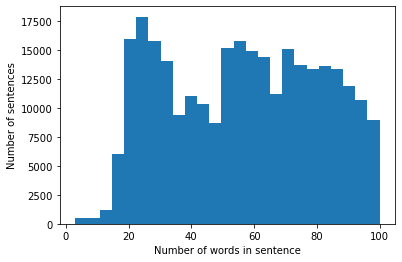

In [24]:
labels_lens = [len(l) for l in labels]

plt.hist(labels_lens, bins=25)
plt.xlabel('Number of words in sentence')
plt.ylabel('Number of sentences')
plt.show()

In [31]:
labels_one = sum([sum(l) for l in labels])
labels_all = sum([len(l) for l in labels]) 

print(f'Percentage of misspelled words in dataset: {round(labels_one / labels_all, 4)}')

Percentage of misspelled words in dataset: 0.3266


In [40]:
ds = TypoDataset()
tokenized_words, tokenized_labels = ds._tokenize_and_preserve_labels(random_words, random_labels)
tokenized_ids = ds.tokenizer.convert_tokens_to_ids(tokenized_words)

print("%-30s %-30s %-1s" % ("WORD", "TOKENIZER ID", "LABEL"))
print('-' * 80)
for word, idx, label in zip(tokenized_words, tokenized_ids, tokenized_labels):
    print("%-30s %-30s %-1s" % (word, idx, label))

WORD                           TOKENIZER ID                   LABEL
--------------------------------------------------------------------------------
[CLS]                          101                            0
these                          2122                           0
gave                           2435                           0
mm                             3461                           1
##e                            2063                           1
a                              1037                           0
eh                             15501                          1
##ada                          8447                           1
##che                          5403                           1
too                            2205                           0
mc                             11338                          1
##uh                           27225                          1
sugar                          5699                           0
and                

In [43]:
train_part = 20000
val_part = 4000
modes = ['train', 'val']
words_m = [words[:train_part], words[train_part:(train_part + val_part)]]
labels_m = [labels[:train_part], labels[train_part:(train_part + val_part)]]

In [44]:
for mode, word, label in zip(modes, words_m, labels_m):
    ds = TypoDataset(mode=mode)
    inp, tg, msk = ds.prepare_dataset(word, label, out_path='../../data/typo_ds/amazon_imdb_big_20k_4k')

In [56]:
print("%-10s %-10s %-10s" % ("WORD_ID", "WORD_LABEL", "WORD_MASK"))
for inp_t, tg_t, msk_t in zip(inp[0], tg[0], msk[0]):
    print("%-10s %-10s %-10s" % (inp_t.item(), tg_t.item(), msk_t.item()))

WORD_ID    WORD_LABEL WORD_MASK 
101        0          1         
1037       0          1         
1060       1          1         
7140       1          1         
10814      1          1         
1997       0          1         
1056       1          1         
28397      1          1         
2058       0          1         
1996       0          1         
2279       0          1         
2261       0          1         
2420       0          1         
1998       0          1         
2169       0          1         
5495       1          1         
2213       1          1         
1045       0          1         
2288       0          1         
22794      1          1         
4017       1          1         
2839       1          1         
23738      1          1         
2594       1          1         
2061       1          1         
29418      1          1         
7507       1          1         
5403       1          1         
8823       1          1         
2000      